In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/seeds.csv')

In [5]:
df.head()

Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1

In [6]:
df.isna().sum()* 100 / len(df)


Area               0.0
Perimeter          0.0
Compactness        0.0
Kernel.Length      0.0
Kernel.Width       0.0
Asymmetry.Coeff    0.0
Kernel.Groove      0.0
Type               0.0
dtype: float64

In [7]:
df.describe()

Area   Perimeter  Compactness  Kernel.Length  Kernel.Width  \
count  199.000000  199.000000   199.000000     199.000000    199.000000   
mean    14.918744   14.595829     0.870811       5.643151      3.265533   
std      2.919976    1.310445     0.023320       0.443593      0.378322   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.330000   13.470000     0.857100       5.267000      2.954500   
50%     14.430000   14.370000     0.873400       5.541000      3.245000   
75%     17.455000   15.805000     0.886800       6.002000      3.564500   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry.Coeff  Kernel.Groove        Type  
count       199.000000     199.000000  199.000000  
mean          3.699217       5.420653    1.994975  
std           1.471102       0.492718    0.813382  
min           0.765100       4.519000    1.000000  
25%           2.570000       5.046000    1.000000  
50%           3.631000       5.228000    2.000000  
75%           4.799000       5.879000    3.000000  
max           8.315000       6.550000    3.000000

In [8]:
df.shape

(199, 8)

In [9]:
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [10]:
sum(df.duplicated())

0

# Data Processing

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Compute quartile values for all columns
quartiles = df.describe(percentiles=[.25, .5, .75])

# Create subplots with multiple box plots arranged horizontally
fig, axes = plt.subplots(1, len(df.columns) - 1, figsize=(20, 5))  # Assuming you have more than one column

# Create box plots for all columns except 'Type'
for i, column in enumerate(df.columns):
    if column != 'Type':
        ax = df.boxplot(column=column, ax=axes[i])

        # Create a table to display quartile values
        q1, q2, q3, q4 = quartiles[column].loc[['25%', '50%', '75%', 'max']]
        table_data = [['Q1 (25%)', f'{q1:.2f}'],
                      ['Q2 (50%)', f'{q2:.2f}'],
                      ['Q3 (75%)', f'{q3:.2f}'],
                      ['Q4 (max)', f'{q4:.2f}']]

        table = axes[i].table(cellText=table_data, colLabels=['Quartile', 'Value'],
                              cellLoc='center', loc='bottom', bbox=[0, -0.35, 1, 0.25])

        axes[i].set_title(f'Box Plot of {column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


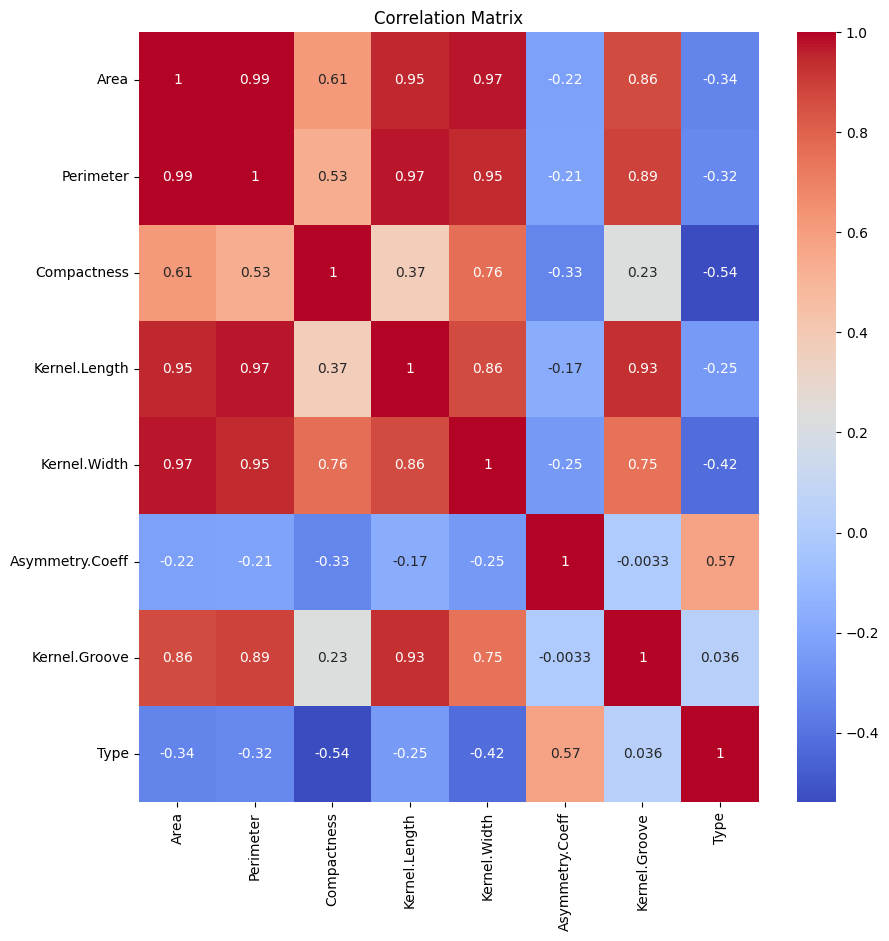

In [12]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 500x400 with 0 Axes>

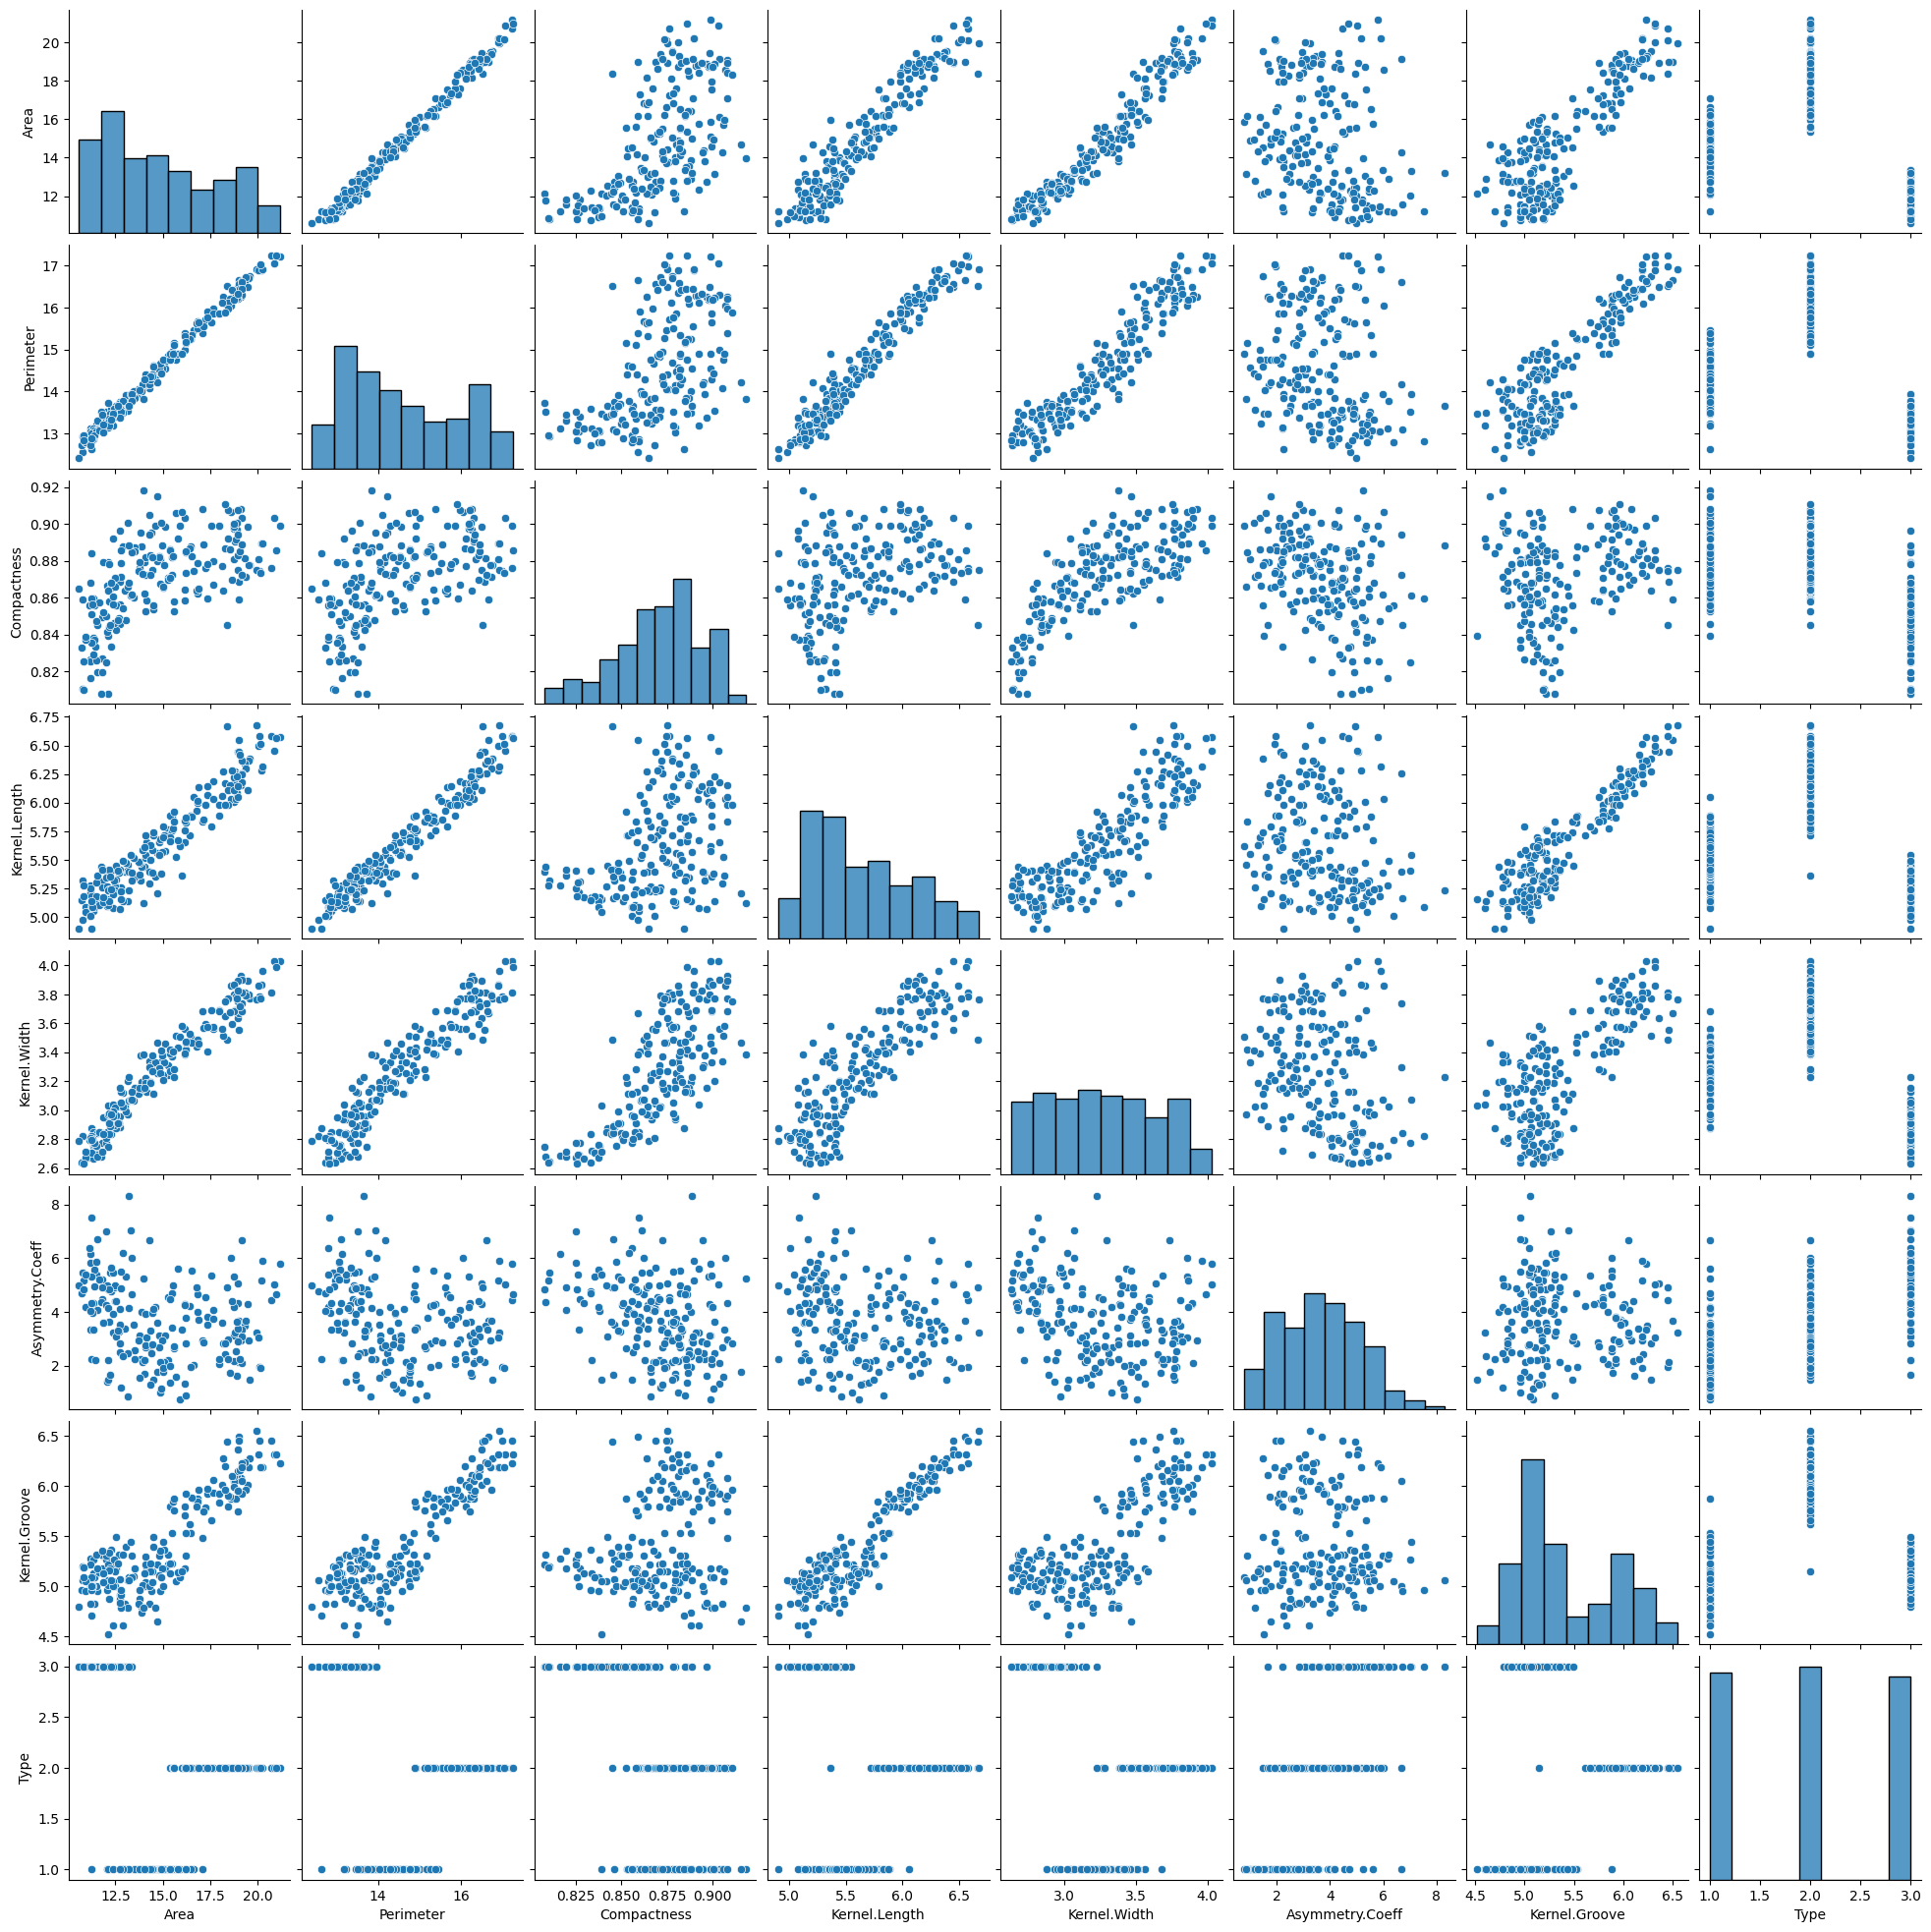

In [13]:
plt.figure(figsize=(5, 4))
sns.pairplot(df)

# PCA Model

Since our data contains seven features, we will apply the model with various components between and plot the component at which the experience variance ratio tends to 1 and the aic score is minimal. After adding up all of these scores, we chose n=3 at which both of them are resembling good criteria for our model. In this case, we will use PCA to our unlabeled data.  

score is -8.013236674595827
Number of Components: 1, AIC: 3191.268196489139
score is -1.4473161440626692
Number of Components: 2, AIC: 580.0318253369423
score is 0.7455137036866771
Number of Components: 3, AIC: -290.7144540672975
score is 1.816395883658526
Number of Components: 4, AIC: -714.9255616960933
score is 2.08832437190403
Number of Components: 5, AIC: -821.1531000178039
score is 3.4107889311523443
Number of Components: 6, AIC: -1345.493994598633
score is 3.4107889311523225
Number of Components: 7, AIC: -1343.4939945986243


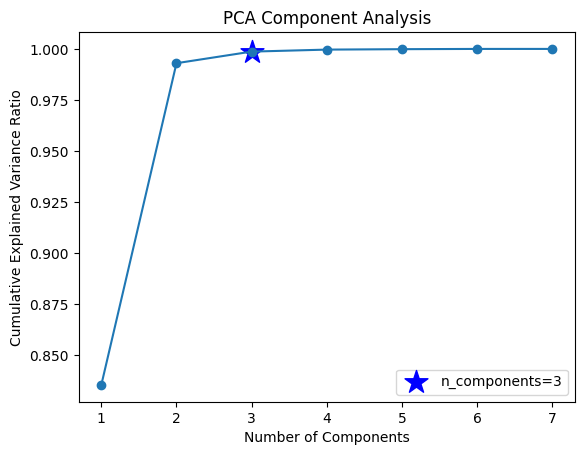

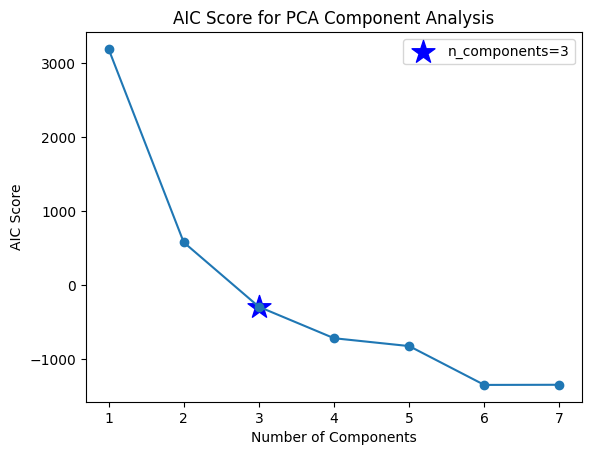

In [14]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X=df.iloc[:,:-1]
X.shape
n_components = np.arange(1, 8)
L=[] #for gathering explained_variance ratio
aic_scores = [] #for gathering
for n in n_components:
    pca = PCA(n_components=n,copy=True)
    pca.fit(X)
    print("score is",pca.score(X))
    L.append(np.sum(pca.explained_variance_ratio_))
    X_transformed = pca.fit_transform(X)
    # Calculate AIC
    k = n  # Number of parameters in PCA
    log_likelihood = np.sum(pca.score_samples(X))
    aic = 2 * k - 2 * log_likelihood
    aic_scores.append(aic)
    print(f"Number of Components: {n}, AIC: {aic}")
# Plot the explained variance ratio
plt.plot(n_components, L, marker='o')
plt.scatter(3, L[2], c='b', marker='*', label="n_components=3",s=300)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Component Analysis')
plt.legend()
plt.show()

# Plot the AIC scores
plt.plot(n_components, aic_scores, marker='o')
plt.scatter(3, aic_scores[2], c='b', marker='*', label="n_components=3",s=300)
plt.xlabel('Number of Components')
plt.ylabel('AIC Score')
plt.title('AIC Score for PCA Component Analysis')
plt.legend()
plt.show()


# Before and After the model comparison


Now that we've selected three, we can use our PCA model to easily plot those three features in three dimensions.
Here, we exhibit the first three facets of the original data. After inversion, we discovered that the numerical values of the training set appeared to be similar to the original data, indicating that our data did not differ too much when the PCA model was applied. This is another point to compare between our data before and after inversion.

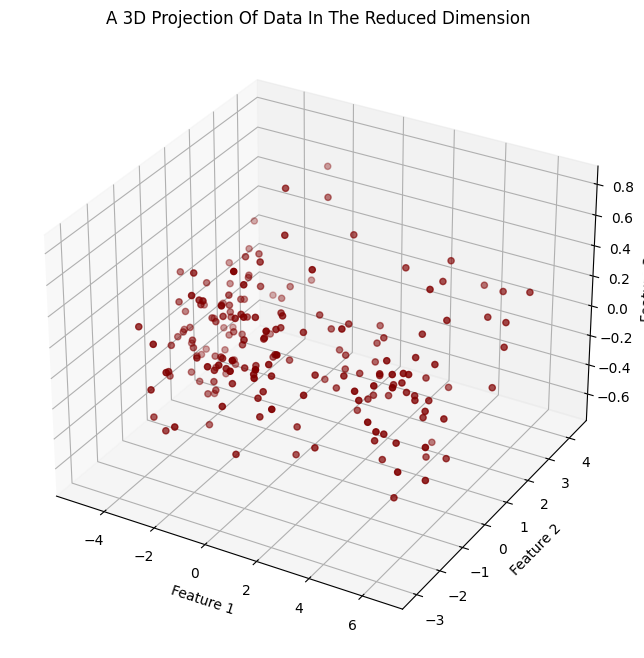

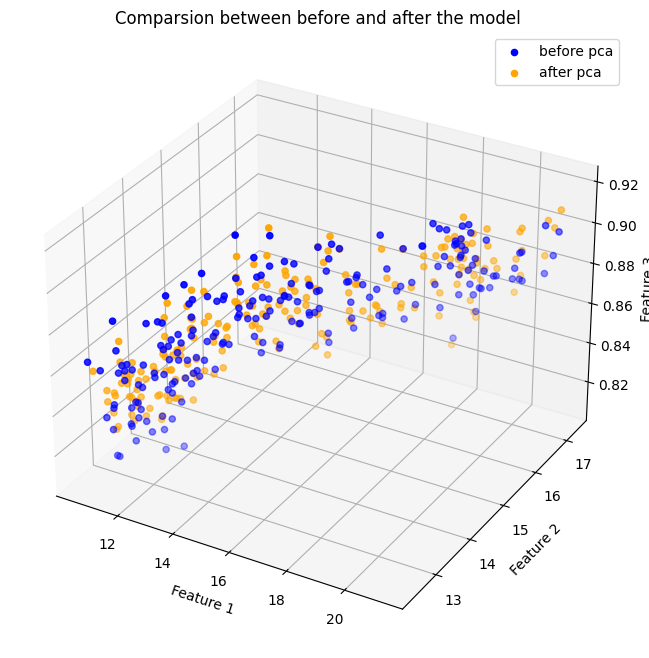

In [15]:
pca = PCA(n_components=3,copy=True)
X_transformed = pca.fit_transform(X)
X_transformed.shape
X_transformed[:5,:]
PCA_ds = pd.DataFrame(X_transformed, columns=(["f1","f2","f3"]))
x = PCA_ds["f1"]
y = PCA_ds["f2"]
z = PCA_ds["f3"]
# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()
afterreverse=pca.inverse_transform(X_transformed)
afterreverse.shape
afterreverse=pd.DataFrame(afterreverse, columns=(["f1","f2","f3","f4","f5","f6","f7"]))
#to compare between 3 features before and after the model
x1 = X["Area"]
y1 = X["Perimeter"]
z1 = X["Compactness"]
######################################
x2 = afterreverse["f1"]
y2 = afterreverse["f2"]
z2 = afterreverse["f3"]

# To plot and compare between original data and after reverse
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1, y1, z1, c="blue", marker="o",label="before pca")
ax.scatter(x2, y2, z2, c="orange", marker="o",label="after pca")
ax.set_title("Comparsion between before and after the model")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


score list (0.3328843911123651,0.5250758650504834,0.47421681014216954,
)
list1=["dbscan","kmeans","aggomlative","Meanshift","fuzzymean"]


# DBSCAN

When I first tried to use Dbscan with the default parameters, I discovered that the score was too low and had a negative value. As a result, I combined various Epsilon and Min sample values and recorded scores, and one of the results seemed to be better than the initial score. I plotted them in three dimensions using the updated labels after applying the selected settings. the used data was that one genereted from pca.

In [45]:
from sklearn.cluster import DBSCAN
dbmodel=DBSCAN()
dbmodel.fit(X_transformed)
PCA_ds['cluster']=dbmodel.labels_
PCA_ds['cluster'].value_counts()
from sklearn.metrics import silhouette_score as ss
ss(X_transformed, PCA_ds['cluster'])
#dbmodel=DBSCAN()
#dbmodel.fit(X)
#df['cluster']=dbmodel.labels_
#df['cluster'].value_counts()
#ss(X, df['cluster'])
#we will try different compinaion of episoln and min sample to get best score
epsilons = np.linspace(0.01, 1, num=15)
epsilons
min_samples = np.arange(2, 20, step=3)
min_samples
import itertools
combinations = list(itertools.product(epsilons, min_samples))
combinations
N = len(combinations)
N
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []
  num_clusterslist=[]
  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    num_clusterslist.append(num_clusters)

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      #print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    #print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]
  best_numberofcluster=num_clusterslist[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score,
          'best_numberofcluster':best_numberofcluster
          }

best_dict = get_scores_and_labels(combinations, X_transformed)
best_dict

{'best_epsilon': 0.9292857142857143,
 'best_min_samples': 8,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        -1, -1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  1,  1,
         1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  0,  0,  1,  0, -1,
         0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0]),
 'best_score': 0.3328843911123

DBSCAN after choosing parameters

 0    112
 1     51
-1     36
Name: cluster, dtype: int64
silhouette_score is : 0.3328843911123651


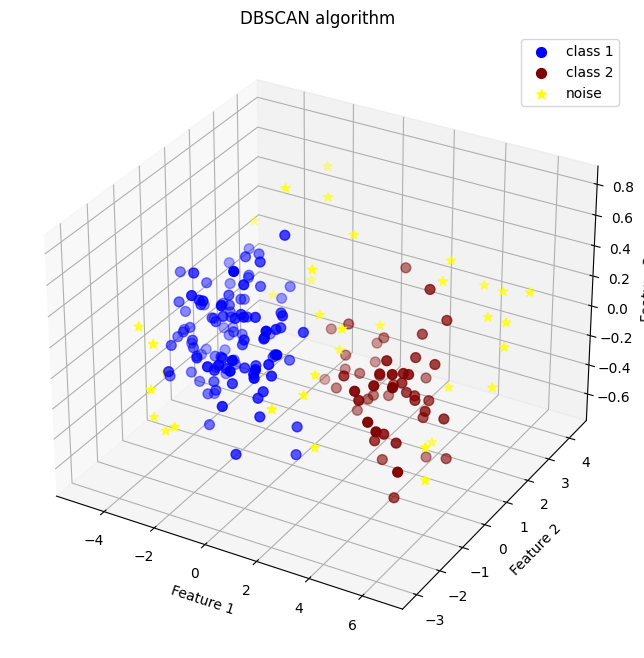

In [46]:
dbmodel=DBSCAN(eps=best_dict['best_epsilon'],min_samples=best_dict['best_min_samples'])
dbmodel.fit(X_transformed)
PCA_ds['cluster']=dbmodel.labels_
PCA_ds['cluster'].value_counts()
print(PCA_ds['cluster'].value_counts())
from sklearn.metrics import silhouette_score as ss
print("silhouette_score is :",best_dict['best_score'])
x = PCA_ds["f1"]
y = PCA_ds["f2"]
z = PCA_ds["f3"]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_transformed[PCA_ds['cluster']==0,0], X_transformed[PCA_ds['cluster']==0,1], X_transformed[PCA_ds['cluster']==0,2], c="blue", marker="o",label="class 1",s=50)
ax.scatter(X_transformed[PCA_ds['cluster']==1,0], X_transformed[PCA_ds['cluster']==1,1], X_transformed[PCA_ds['cluster']==1,2], c="maroon", marker="o",label="class 2",s=50)
ax.scatter(X_transformed[PCA_ds['cluster']==-1,0], X_transformed[PCA_ds['cluster']==-1,1], X_transformed[PCA_ds['cluster']==-1,2], c="yellow", marker="*",label="noise",s=50)
ax.set_title("DBSCAN algorithm")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


#Mean shift


Mean shift is considered to be one of the dedcated algorithms that can be used for unsupervised learning it  doesn't need to have the number of clusters it determines it  by itself by compressing points to get a bubble as acnter of each of them here we first tried defferint values of bandwisths and compare there silhoute score after findinf the maximum one we applied the model again and plot the new clusters   

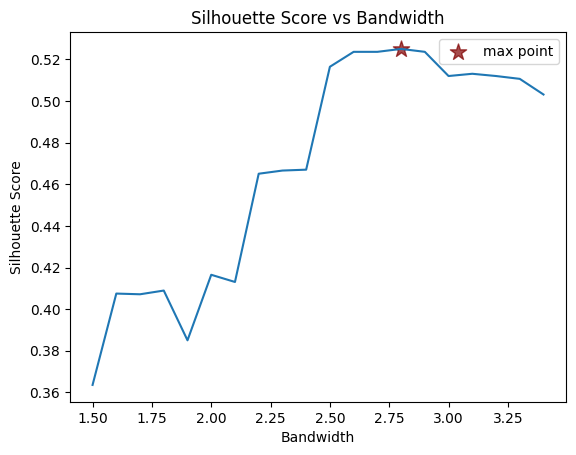

In [47]:
from sklearn.cluster import MeanShift
bandwidths = np.arange(1.5, 3.5, step=0.1)
best_silhouette_score = -1
best_bandwidth = None
best_labels = None
centers=None
scorelist=[]
for bandwidth in bandwidths:
    # Instantiate MeanShift with the current bandwidth
    ms = MeanShift(bandwidth=bandwidth)
    # Fit MeanShift to the data
    ms.fit(X_transformed)
    # Get cluster labels
    labels = ms.labels_

    # Compute silhouette score
    silhouette_avg = silhouette_score(X_transformed, labels)
    scorelist.append(silhouette_avg)
    #print(f"Bandwidth: {bandwidth}, Silhouette Score: {silhouette_avg}")
    # Check if the current bandwidth gives a better silhouette score
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_bandwidth = bandwidth
        best_labels = labels
        centers=ms.cluster_centers_
#best_silhouette_score
best_dict={'best_silhouette_score': best_silhouette_score,
          'best_bandwidth': best_bandwidth,
          'best_labels': best_labels,
          'centers': centers
          }
plt.plot(bandwidths, scorelist)
plt.scatter(best_bandwidth,best_silhouette_score,marker='*',s=150,alpha=0.7,c='maroon',label='max point')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Bandwidth')
plt.legend()
plt.show()


After choosing best hyparameter for mean shift

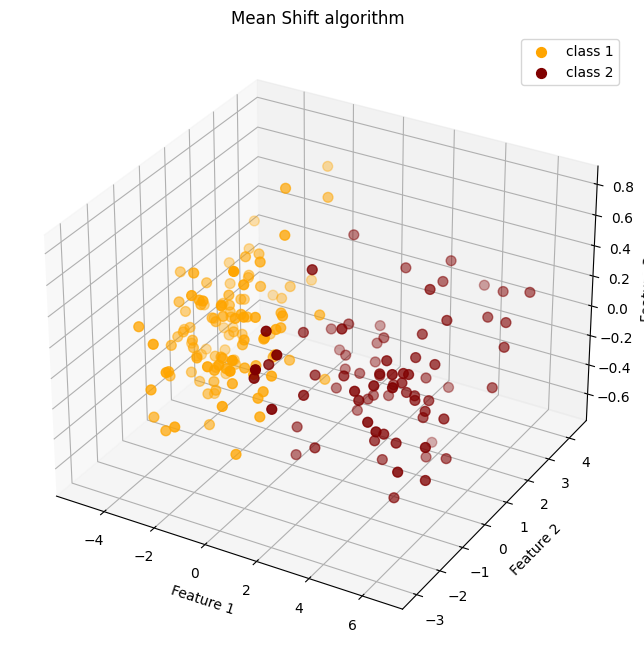

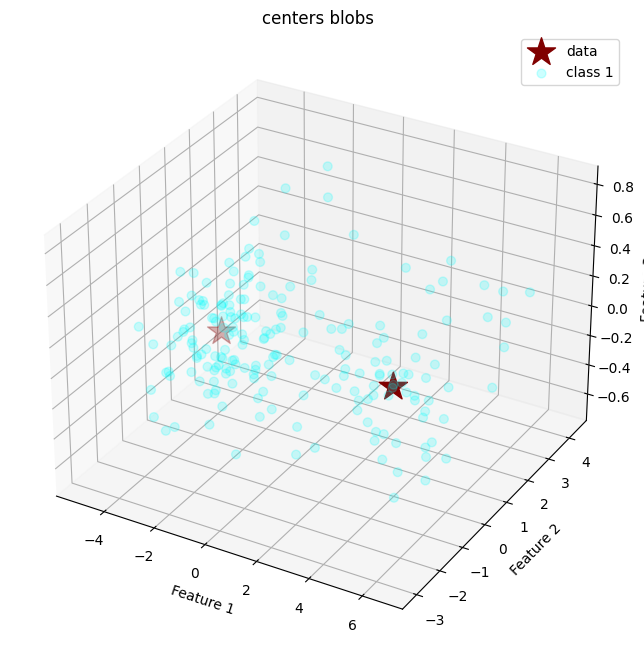

{'best_silhouette_score': 0.5250758650504834, 'best_bandwidth': 2.800000000000001, 'best_labels': array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0]), 'centers': array([[-2.65681239e+00, -1.22220202e-01,  7.26561855e-04],
       [ 3.81992149e+00,  1.36631919e-01, -7.93124799e-02]])}


In [48]:
PCA_ds['MEANSHIFT']=best_labels

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_transformed[PCA_ds['MEANSHIFT']==0,0], X_transformed[PCA_ds['MEANSHIFT']==0,1], X_transformed[PCA_ds['MEANSHIFT']==0,2], c="orange", marker="o",label="class 1",s=50)
ax.scatter(X_transformed[PCA_ds['MEANSHIFT']==1,0], X_transformed[PCA_ds['MEANSHIFT']==1,1], X_transformed[PCA_ds['MEANSHIFT']==1,2], c="maroon", marker="o",label="class 2",s=50)
ax.set_title("Mean Shift algorithm")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c="maroon", marker="*",label="data",s=450,zorder=10 )
ax.scatter(x, y, z, c="aqua", marker="o",label="class 1",s=40,alpha=0.2)
ax.set_title("centers blobs")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()
print(best_dict)


In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df['Type'], best_labels+1)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(set(df['Type'])), yticklabels=sorted(set(df['Type'])))
plt.title('Confusion Matrix for Mean shift')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Fuzzy c-means

FCM is a clustering algorithm similar to k-means, but it assigns membership probabilities to each point belonging to each cluster rather than strictly assigning it to one cluster.

Hyperparameters of FCM typically include the number of clusters (k) and a fuzziness parameter (m) that determines the degree of fuzziness in the clustering

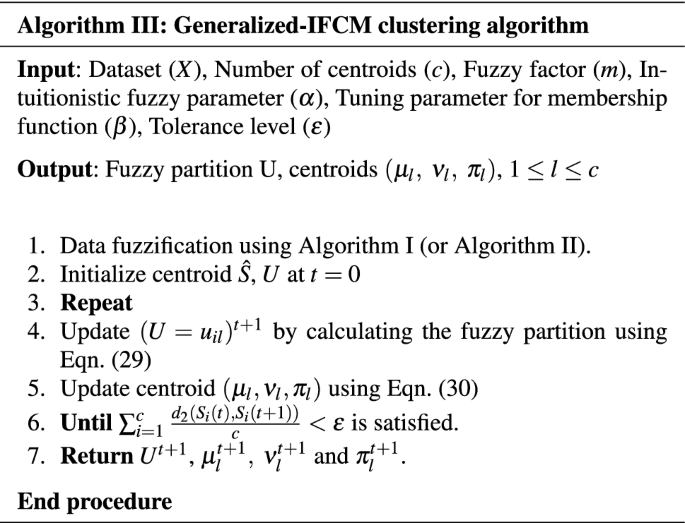

In [21]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=163927f62172e02d797a8568948178f0a704e3bc22f902fabeb374cced93079e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Fuzzy C-Means clustering
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_transformed.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

# Assigning clusters
cluster_membership = np.argmax(u, axis=0)

# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
for i in range(n_clusters):
    cluster_points = X_transformed[cluster_membership == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i + 1}')

ax.scatter(cntr[0], cntr[1], cntr[2], marker='*', s=200, c='red', label='Cluster Centers')
ax.set_title('Fuzzy C-Means Clustering on PCA-transformed Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()

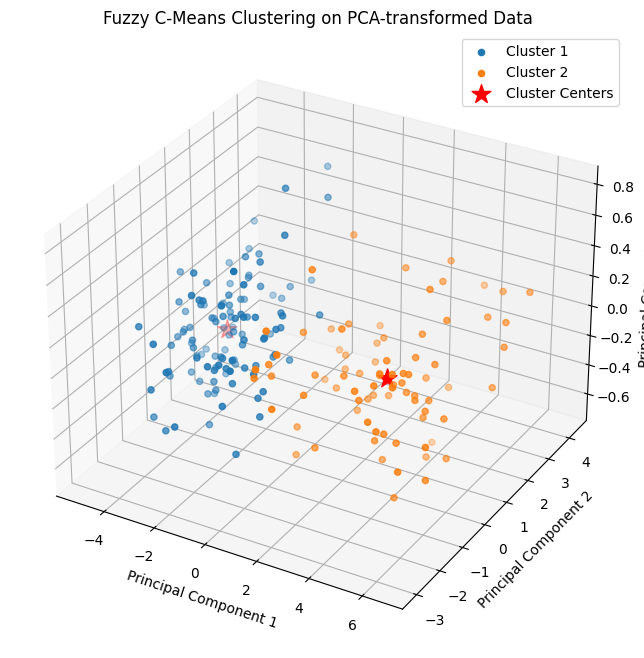

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Fuzzy C-Means clustering
n_clusters = 2  # Change to 2 clusters
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_transformed.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

# Assigning clusters
cluster_membership = np.argmax(u, axis=0)

# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
for i in range(n_clusters):
    cluster_points = X_transformed[cluster_membership == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i + 1}')

ax.scatter(cntr[:, 0], cntr[:, 1], cntr[:, 2], marker='*', s=200, c='red', label='Cluster Centers')  # Corrected
ax.set_title('Fuzzy C-Means Clustering on PCA-transformed Data')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()


In [24]:
fuzz = silhouette_score(X_transformed,cluster_membership)
fuzz

0.5236743138811327

In [25]:
import numpy as np
import plotly.graph_objects as go
import skfuzzy as fuzz

# Define the number of clusters
n_clusters = 2

# Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X_transformed.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)
cluster_membership = np.argmax(u, axis=0)

# Create an interactive 3D scatter plot with Plotly
fig = go.Figure()

# Scatter plot for each cluster
for i in range(n_clusters):
    cluster_points = X_transformed[cluster_membership == i]
    fig.add_trace(go.Scatter3d(
        x=cluster_points[:, 0],
        y=cluster_points[:, 1],
        z=cluster_points[:, 2],
        mode='markers',
        marker=dict(size=8, opacity=0.7),
        name=f'Cluster {i + 1}'
    ))

# Plot cluster centers
fig.add_trace(go.Scatter3d(
    x=cntr[:, 0],
    y=cntr[:, 1],
    z=cntr[:, 2],
    mode='markers',
    marker=dict(size=12, symbol='cross', color='red'),
    name='Cluster Centers'
))

# Create a grid for contour plots
x1 = np.linspace(np.min(X_transformed[:, 0]), np.max(X_transformed[:, 0]), 100)
x2 = np.linspace(np.min(X_transformed[:, 1]), np.max(X_transformed[:, 1]), 100)
X, Y = np.meshgrid(x1, x2)

# Plot contour plots for each cluster
for i in range(n_clusters):
    Z = fuzz.membership.gaussmf(X, cntr[i, 0], np.std(X_transformed[:, 0]))
    Z *= fuzz.membership.gaussmf(Y, cntr[i, 1], np.std(X_transformed[:, 1]))
    Z *= fuzz.membership.gaussmf(X, cntr[i, 2], np.std(X_transformed[:, 2]))

    fig.add_trace(go.Surface(
        z=Z,
        x=X[:, 0],
        y=Y[:, 0],
        showscale=False,
        opacity=0.5,
        colorscale='viridis',
        name=f'Cluster {i + 1} Contour'
    ))

# Update layout for better visibility
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
    ),
    title='Interactive 3D Fuzzy C-Means Clustering with Contours',
)

# Show the interactive plot
fig.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Set up the loop and plot
fig1 = plt.figure(figsize=(16, 9))
axes1 = fig1.subplots(3, 3, subplot_kw={'projection': '3d'})
alldata = X_transformed.T  # Transpose X_transformed to match the shape of alldata
fpcs = []
silhouette_scores = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Calculate silhouette score
    cluster_membership = np.argmax(u, axis=0)
    silhouette_avg = silhouette_score(alldata.T, cluster_membership)
    silhouette_scores.append(silhouette_avg)

    # Plot assigned clusters, for each data point in the training set
    for j in range(ncenters):
        ax.scatter(alldata[0, cluster_membership == j],
                   alldata[1, cluster_membership == j],
                   alldata[2, cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster with a star
    ax.scatter(cntr[:, 0], cntr[:, 1], cntr[:, 2], marker='*', color='r', s=200, label='Cluster Centers')

    ax.set_title('Centers = {0}; FPC= {1:.2f}; Silhouette Score = {2:.2f}'.format(ncenters, fpc, silhouette_avg))
    ax.legend()


fig1.tight_layout()
plt.show()


# Entropy-Based Fuzzy

Entropy-based fuzzy systems incorporate entropy measures to optimize various aspects of fuzzy logic systems.

Hyperparameters might include parameters related to entropy calculation, such as the type of entropy measure used or the weight given to entropy in the optimization process.

In [27]:
pip install -U scikit-fuzzy

image.png

The function entropy_fuzzy_clustering takes input data X, number of clusters n_clusters, fuzzifier m, maximum number of iterations max_iter, and convergence tolerance tol.

It initializes cluster centers randomly and membership matrix randomly.

Then, it iteratively updates cluster centers and membership values until convergence, similar to the entropy-based FCM implementation discussed earlier.

The update rules incorporate an entropy term to encourage more separated clusters.

Convergence is checked based on the change in cluster centers from one iteration to the next.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.stats import entropy
from sklearn.metrics import silhouette_score

# Entropy-based Fuzzy Clustering
def entropy_fuzzy_clustering(X, n_clusters=3, m=2, max_iter=100, tol=1e-4):
    # Initialize cluster centers randomly
    centroids = np.random.rand(n_clusters, X.shape[1])

    # Initialize membership matrix randomly
    U = np.random.rand(X.shape[0], n_clusters)
    U /= np.sum(U, axis=1)[:, None]

    for _ in range(max_iter):
        # Calculate cluster centers
        centroids_prev = centroids.copy()
        centroids = np.dot(U.T, X) / np.sum(U, axis=0)[:, None]

        # Update membership matrix with entropy term
        dist = cdist(X, centroids)
        d2 = dist ** 2
        entropy_term = np.zeros_like(U)
        for j in range(n_clusters):
            entropy_term[:, j] = entropy(U.T[j]) / np.sum(d2[:, j] / np.min(d2, axis=1))
        U = 1 / (d2 / np.min(d2, axis=1)[:, None]) ** (1 / (m - 1)) + entropy_term
        U /= np.sum(U, axis=1)[:, None]

        # Check for convergence
        if np.linalg.norm(centroids - centroids_prev) < tol:
            break

    return centroids, U

# Perform entropy-based fuzzy clustering
n_clusters = 2
centroids_entropy, membership_entropy = entropy_fuzzy_clustering(X_transformed, n_clusters=n_clusters)

# Calculate FPC and silhouette score
dist = cdist(X_transformed, centroids_entropy)
d2 = dist ** 2
fpc = np.sum(np.min(d2, axis=1)) / np.sum(d2)
silhouette_avg = silhouette_score(X_transformed, np.argmax(membership_entropy, axis=1))

# Visualize the clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot cluster points
for i in range(n_clusters):
    cluster_points_entropy = X_transformed[membership_entropy.argmax(axis=1) == i]
    ax.scatter(cluster_points_entropy[:, 0], cluster_points_entropy[:, 1], cluster_points_entropy[:, 2], label=f'Cluster {i + 1}')

# Plot cluster centers
ax.scatter(centroids_entropy[:, 0], centroids_entropy[:, 1], centroids_entropy[:, 2], marker='*', s=200, c='red', label='Cluster Centers')

# Set plot title and labels with FPC and silhouette score
ax.set_title('Entropy-based Fuzzy Clustering on PCA-transformed Data\nCenters = {}; FPC= {:.16f}; Silhouette Score = {:.16f}'.format(n_clusters, fpc, silhouette_avg))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


#Kmeans clusters

In [28]:
df['Type'].nunique()

3

In [29]:
X=df.iloc[:,:-1]

In [30]:
X_transformed.dtype

dtype('float64')

In [50]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.scatter(3,wcss[2],marker='*',s=159,alpha=0.7,c='maroon',label='optimal point')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.show()

In [32]:
X_transformed

array([[ 5.70122874e-01, -1.43217281e+00,  4.54600942e-02],
       [ 2.12147240e-01, -2.70135005e+00,  2.34120748e-01],
       [-7.51216945e-01, -1.13589426e+00,  5.30828988e-01],
       [-1.15003604e+00, -1.62238169e+00,  4.40390377e-01],
       [ 1.52055057e+00, -2.20603586e+00,  3.34999097e-01],
       [-5.69428943e-01, -1.34217010e+00,  3.58828692e-01],
       [-2.67829668e-01, -1.58253208e-01,  1.46833999e-01],
       [ 2.18886721e+00, -1.38715623e+00, -3.49414761e-01],
       [ 1.88445314e+00, -1.51986462e+00, -1.25587326e-03],
       [ 2.94553533e-01,  8.74173174e-01,  1.20740190e-01],
       [-8.09868515e-01, -2.11017297e+00,  1.40540317e-01],
       [-1.29441992e+00,  9.43544803e-02,  4.93389545e-01],
       [-1.25674638e+00, -7.43268222e-01,  2.64410114e-01],
       [-1.28206791e+00, -9.53417309e-01,  2.64717276e-01],
       [-5.86521778e-01,  3.71916924e-01,  6.63054178e-01],
       [-1.44534962e+00,  1.32400661e+00,  8.08663475e-01],
       [ 9.59259439e-01, -2.03380515e+00

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X_transformed)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('KMeans Clustering - 3D Scatter Plot')
ax.legend()

plt.show()

In [34]:
silhouette_avg = silhouette_score(X_transformed, labels)
silhouette_avg

0.47421681014216954

# Aggomlative clustering

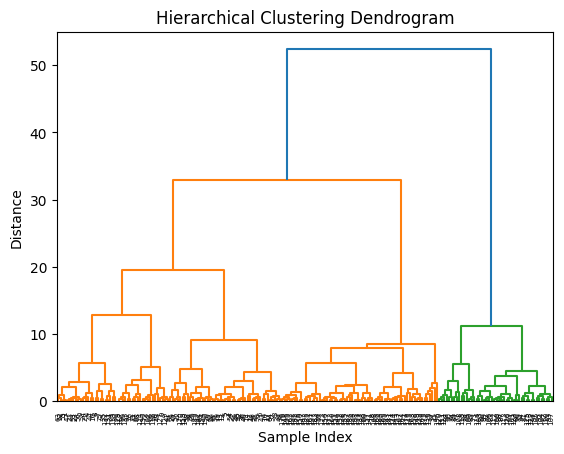

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X_transformed, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [36]:
agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(X_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



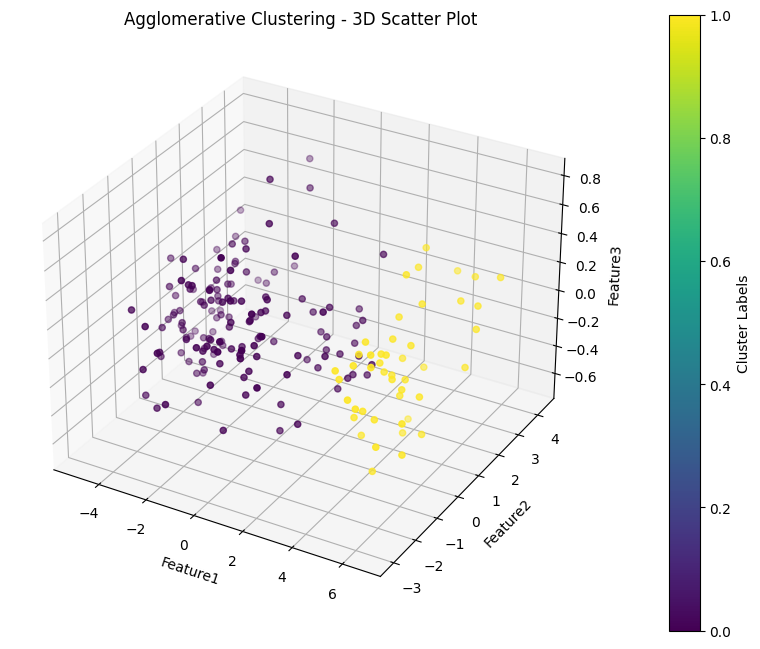

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('Agglomerative Clustering - 3D Scatter Plot')
colorbar = plt.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Cluster Labels')

plt.show()

In [38]:
silhouette_avg = silhouette_score(X_transformed, labels)
silhouette_avg

0.4811327985496307

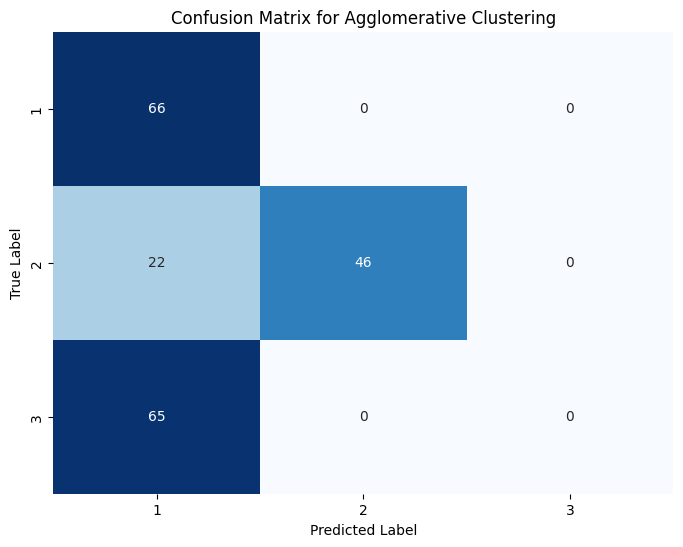

In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(df['Type'], labels+1)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=sorted(set(df['Type'])), yticklabels=sorted(set(df['Type'])))
plt.title('Confusion Matrix for Agglomerative Clustering')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Kmeans Mini Batch

In [57]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import itertools
import matplotlib.pyplot as plt
import itertools
ncluster = np.arange(2, 7)
ncluster
batchsize = np.arange(1, 20, step=2)
batchsize
combinations = list(itertools.product(ncluster, batchsize))
len(combinations)
n_clusters = np.arange(2, 7)
batch_sizes = np.arange(1, 20, step=2)
combinations = list(itertools.product(n_clusters, batch_sizes))
def get_scores_and_labels(combinations, X):
    inertias = []
    all_labels_list = []
    num_clusters_list = []
    inertias1 = 100000
    batch = 0
    cluster = 0
    center=0

    for i, (n_cluster, batch_size) in enumerate(combinations):
        kmeans_model = MiniBatchKMeans(n_clusters=n_cluster, batch_size=batch_size, random_state=42,n_init='auto')
        kmeans_model.fit(X)
        labels = kmeans_model.labels_
        inertias.append(kmeans_model.inertia_)
        num_clusters = len(set(labels))
        num_clusters_list.append(num_clusters)
        if(inertias1>kmeans_model.inertia_):
          inertias1=kmeans_model.inertia_
          batch=batch_size
          cluster=num_clusters

        if (num_clusters < 2) or (num_clusters > 50):
            all_labels_list.append('bad')
            c = (n_cluster, batch_size)
            # print(f"Combination {c} on iteration {i+1} of {len(combinations)} has {num_clusters} clusters. Moving on")
            continue

        all_labels_list.append(labels)

    best_dict={'inertias1': inertias1,
          'batch': batch_size,
          'cluster': num_clusters
          }
    #print(best_dict)
    return inertias, num_clusters_list, all_labels_list

#inertias, num_clusters_list, all_labels_list = get_scores_and_labels(combinations, X)
get_scores_and_labels(combinations, X)


([1023.232606306161,
  1363.953335115536,
  1007.2036386466989,
  971.7829804813839,
  965.7629562884017,
  981.5497860381695,
  938.435976834021,
  955.1056747976961,
  954.2296785415008,
  946.0245425582137,
  549.6527847729909,
  625.9560311964844,
  905.1695275167826,
  549.4728011816167,
  549.1328163046462,
  572.8103983938097,
  552.0848701243149,
  567.2007202747094,
  552.1371799457495,
  557.3354515544295,
  552.2953534304995,
  464.2623716825193,
  455.78316263952433,
  451.5477529685436,
  461.7647346192838,
  448.5468443114583,
  443.967579279628,
  441.4492923846458,
  449.9778776152608,
  446.9065752803938,
  390.5387422702674,
  388.57108804895086,
  410.82491913607134,
  367.5009694543421,
  378.2984698931019,
  396.5299252283461,
  368.0066526005555,
  367.9297436162095,
  370.77470095642286,
  395.1039228990262,
  335.80008451789286,
  505.93843565036997,
  337.8912987779422,
  339.3757669964468,
  336.91027319679006,
  330.50586447542196,
  308.57169057877763,
  335

In [58]:
inertias, num_clusters_list, all_labels_list = get_scores_and_labels(combinations, X)


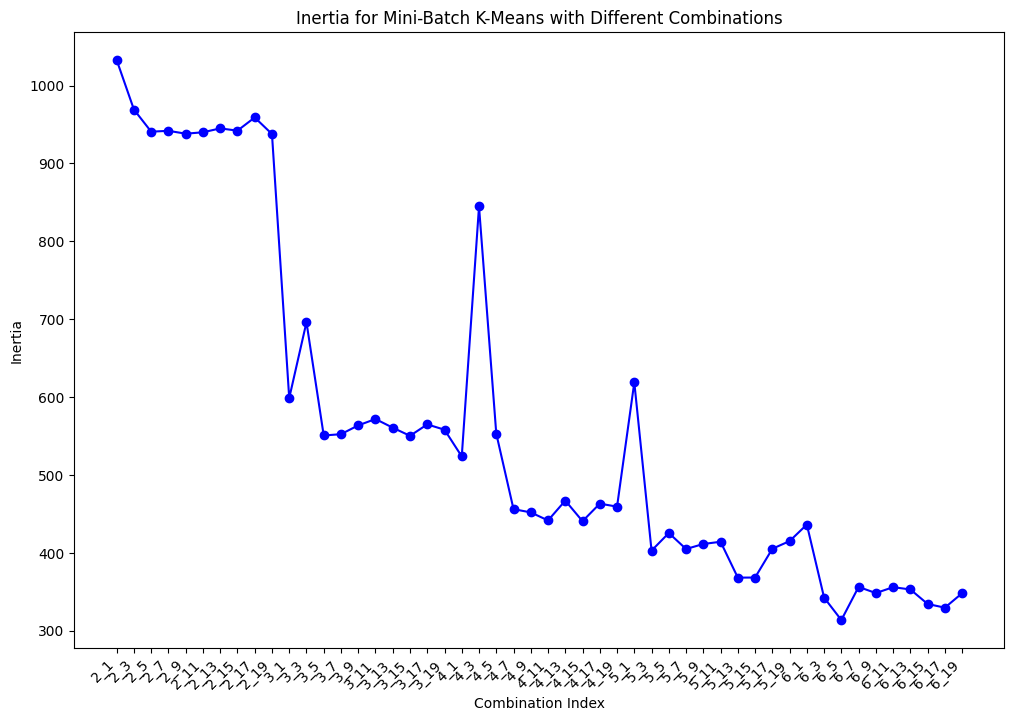

In [53]:
plt.figure(figsize=(12, 8))
l = np.arange(0,50)
plt.plot(l, inertias, marker='o', linestyle='-', color='b')
plt.xlabel('Combination Index')
plt.ylabel('Inertia')
plt.title('Inertia for Mini-Batch K-Means with Different Combinations')
plt.xticks(range(len(combinations)), [f'{n}_{b}' for n, b in combinations], rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



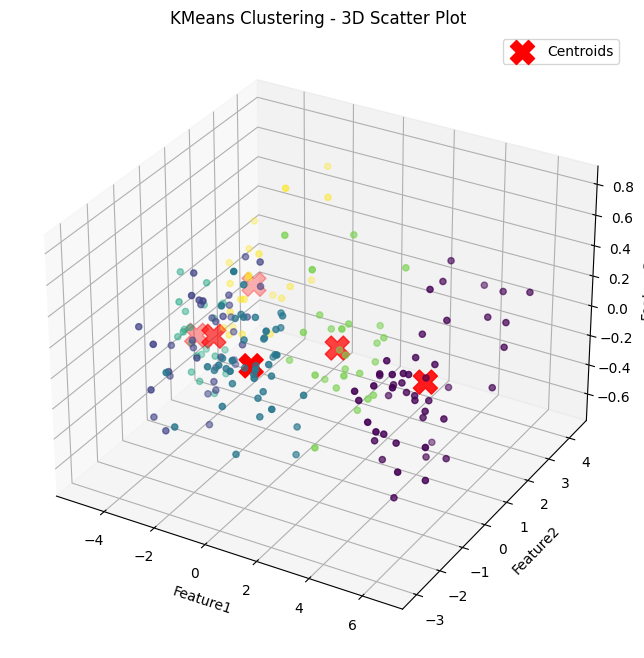

0.32618606987877913

In [54]:
kmeans_Mini_batch = MiniBatchKMeans(n_clusters=6, batch_size=19, random_state=42)
labels5 = kmeans_Mini_batch.fit_predict(X_transformed)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=labels5, cmap='viridis')
ax.scatter(kmeans_Mini_batch.cluster_centers_[:, 0], kmeans_Mini_batch.cluster_centers_[:, 1], kmeans_Mini_batch.cluster_centers_[:, 2],
           s=300, c='red', marker='X', label='Centroids')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('KMeans Clustering - 3D Scatter Plot')
ax.legend()

plt.show()

silhouette_avg = silhouette_score(X_transformed, labels5)
silhouette_avg

# Accuracy Scores

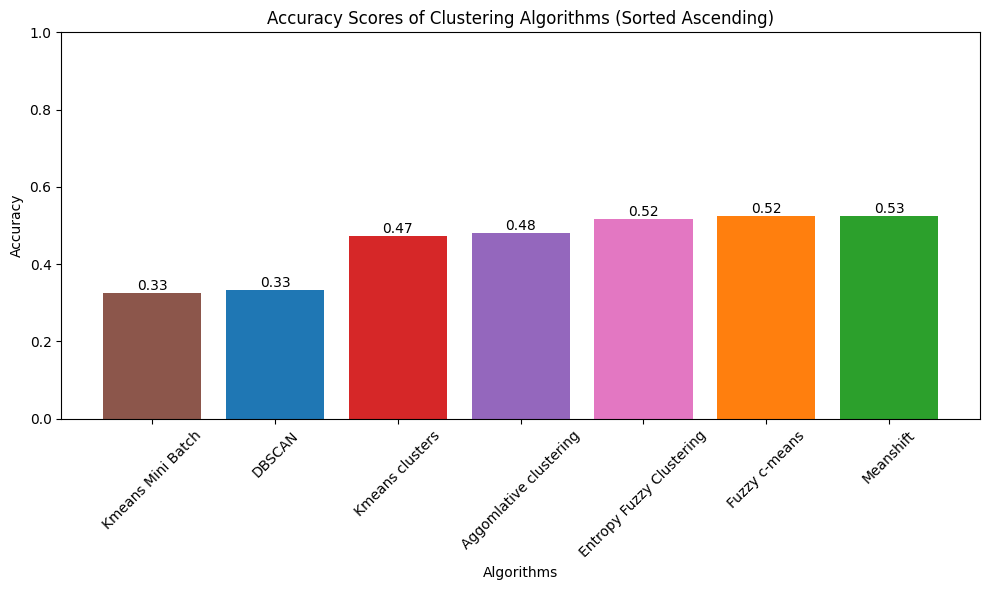

In [44]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['DBSCAN', 'Fuzzy c-means', 'Meanshift', 'Kmeans clusters', 'Aggomlative clustering', 'Kmeans Mini Batch','Entropy Fuzzy Clustering']

# Accuracy scores
accuracy_scores = [0.3328843911123651, 0.5236743138811327
, 0.5250758650504834, 0.47421681014216954, 0.4811327985496307, 0.32618606987877913,0.5180042016054348]

# Color for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Sort the algorithms and accuracy_scores based on accuracy scores
sorted_data = sorted(zip(algorithms, accuracy_scores, colors), key=lambda x: x[1])

# Unpack the sorted data
sorted_algorithms, sorted_accuracy_scores, sorted_colors = zip(*sorted_data)

# Create bar plot with specific colors
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_algorithms, sorted_accuracy_scores, color=sorted_colors)
plt.title('Accuracy Scores of Clustering Algorithms (Sorted Ascending)')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add accuracy scores on top of each bar
for bar, score in zip(bars, sorted_accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## BY:
# Menna Elminshawy
# Salma Muhamed Entsar
# khadega mohamed maged moussa mohamed